## Heart disease

![title](Datascience/1021SuddenDeathHCM_SC.jpg)

**"heart disease"** is term usually refered to several of heart conditions. Sometimes heart disease may be “silent” and not diagnosed until a person experiences signs or symptoms of a heart attack, heart failure, or an arrhythmia. When these events happen, symptoms may include:

* **Heart attack:** Chest pain or discomfort, upper back or neck pain, indigestion, heartburn, nausea or vomiting, extreme fatigue, upper body discomfort, dizziness, and shortness of breath;
* **Arrhythmia:** Fluttering feelings in the chest (palpitations);
* **Heart failure:** Shortness of breath, fatigue, or swelling of the feet, ankles, legs, abdomen, or neck veins.

According with **Mayo Clinic** risk factors for developing heart disease include:

* 1. **Age**. Growing older increases your risk of damaged and narrowed arteries and a weakened or thickened heart muscle;
* 2. **Sex**. Men are generally at greater risk of heart disease. The risk for women increases after menopause.
* 3. **Family history**. A family history of heart disease increases your risk of coronary artery disease, especially if a parent developed it at an early age (before age 55 for a male relative, such as your brother or father, and 65 for a female relative, such as your mother or sister).
* 4. **Smoking**. Nicotine tightens your blood vessels, and carbon monoxide can damage their inner lining, making them more susceptible to atherosclerosis. Heart attacks are more common in smokers than in nonsmokers.
* 5. **Poor diet**. A diet that's high in fat, salt, sugar and cholesterol can contribute to the development of heart disease.
* 6 **High blood pressure**. Uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows.
* 7. **High blood cholesterol levels**. High levels of cholesterol in your blood can increase the risk of plaque formation and atherosclerosis.
* 8. **Diabetes**. Diabetes increases your risk of heart disease. Both conditions share similar risk factors, such as obesity and high blood pressure.
* 9. **Obesity**. Excess weight typically worsens other heart disease risk factors.
* 10. **Physical inactivity**. Lack of exercise also is associated with many forms of heart disease and some of its other risk factors as well.
* 11. **Stress**. Unrelieved stress may damage your arteries and worsen other risk factors for heart disease.
* 12. **Poor dental health**. It's important to brush and floss your teeth and gums often, and have regular dental checkups. If your teeth and gums aren't healthy, germs can enter your bloodstream and travel to your heart, causing endocarditis.

**As many people around the world are affected for some kind of heart problem, is fundamental a quick diagnosis in order to reduce the fatalaty of cases. For this reason, datascience can be an importante tool for possible heart problem predictions and so contribute to the reduction of heart death cases** 

In [1]:
#--------------------------------- Dataset importing ------------------------#
import pandas as pd

#--------------------------------- Dataset visualization --------------------#
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------------------- Machine learning ------------------------#
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Dataset import and initial information 

Features explanation:

* **sex** = 1-male; 0-female;
* **cp** = Chest pain type (0-typical angina; 1- atypical angina; 2-non-angina pain; 3-asymptomatic);
* **trestbps** = resting blood pressure;
* **chol** = serum cholestoral (Total of blood cholesterol: LDL = ["bad"] + HDL = ["good"] + triglycerides + VLDL);
* **fbs** = fasting blood sugar (> 120 mg/dl);
* **restecg** = resting electrocardiographic: 0- Normal, 1- Having ST-T, 2- hypertrophy;
* **thalach** = maximum heart rate achieved (in beats per minute);
* **exang** = exercise induced angina (Angina is caused by reduced blood flow to your heart muscle);
* **oldpeak** = ST depression induced by exercise relative to rest;
* **slope** = the slope of the peak exercise ST segment (0-upsloping, 1-flat, 2-downsloping);
* **ca** = number of major vessels (0-3) colored by flourosopy;
* **thal** = thalassemia => 1-fixed defect (no blood flow in some part of the heart); 2-normal blood flow; 3-reversible defect (a blood flow is observed but it is not normal).
* target = 0-yes; 1-no


Some importante points are:

* A typical electrocardiography must have an slight upward concavity in ST segment. 
* Flat, downsloping, or depressed ST segments may indicate a disease (coronary ischemia).
* ST depression may be associated with subendocardial myocardial infarction, hypokalemia, or digitalis toxicity.
* The J point (the point of inflection at the junction of the S wave and ST segment) becomes depressed during exercise, with maximum depression at peak exercise. The normal ST segment during exercise therefore slopes sharply upwards.

References:

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/#:~:text=Normal%20trace%20during%20exercise,exercise%20therefore%20slopes%20sharply%20upwards.

* https://en.wikipedia.org/wiki/ST_segment

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In this initial information is possible to see there is no missing values. But might be some "?" or "Unknown". Let's check this!

In [4]:
for i, attribute in enumerate (df.columns):
    
    print("#----------------------------------- Unique values for", attribute, "----------------------------------")
    print(df[attribute].unique())
    print("")

#----------------------------------- Unique values for age ----------------------------------
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

#----------------------------------- Unique values for sex ----------------------------------
[1 0]

#----------------------------------- Unique values for cp ----------------------------------
[3 2 1 0]

#----------------------------------- Unique values for trestbps ----------------------------------
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

#----------------------------------- Unique values for chol ----------------------------------
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 

## 2. Numerical features

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

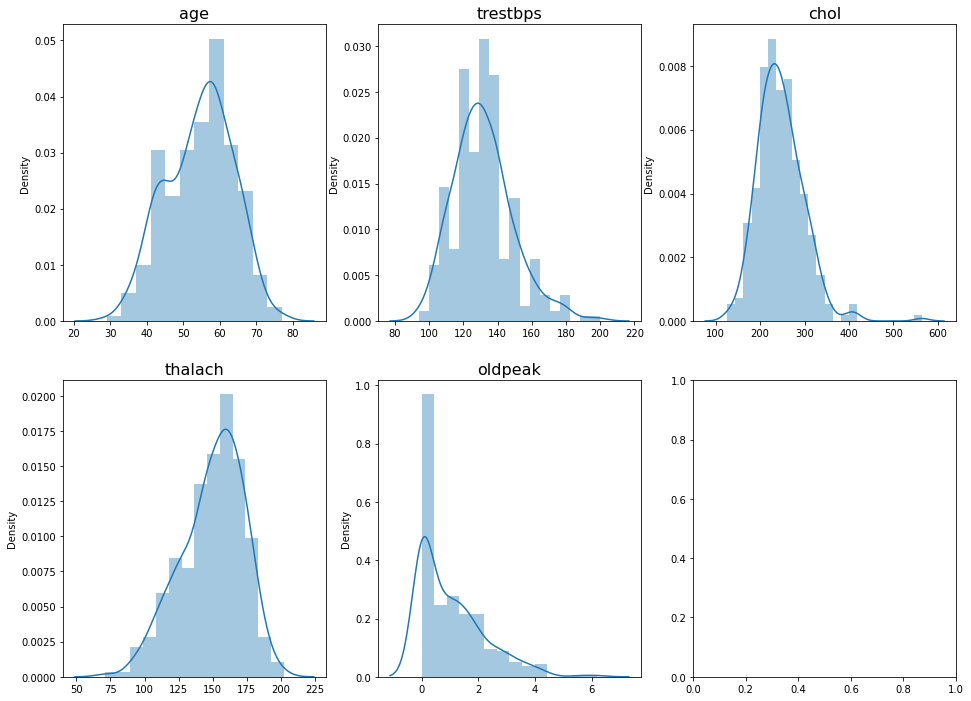

In [5]:
num_feature = ["age", "trestbps", "chol", "thalach", "oldpeak"]

fig, ax = plt.subplots(2, 3, figsize = (16, 12))
cont = 0

for i, ax in enumerate(fig.axes):
    
    if cont < len(num_feature):
        
        g = sns.distplot(x = df[num_feature[i]], ax = ax)
        g.set_title(num_feature[i], fontsize = 16)
        
        cont +=1

### 2.1. Linear correlation among numerical variables 

Text(0.5, 1.0, 'Correlation Matrix')

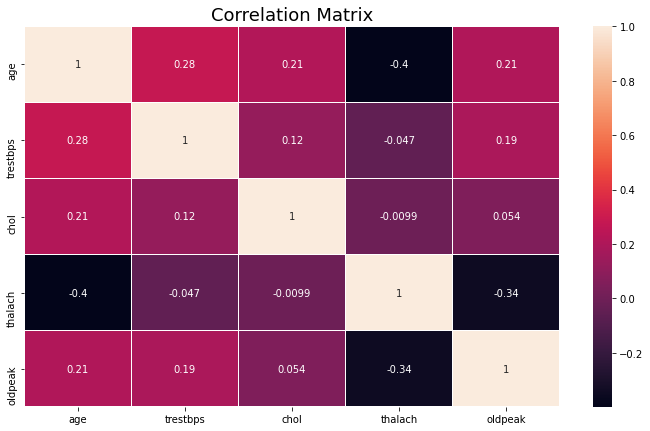

In [6]:
correlation = df[num_feature].corr()

plt.figure(figsize = (12, 7))

g = sns.heatmap(correlation, annot=True, linewidths=.5)
g.set_title("Correlation Matrix", fontsize = 18)

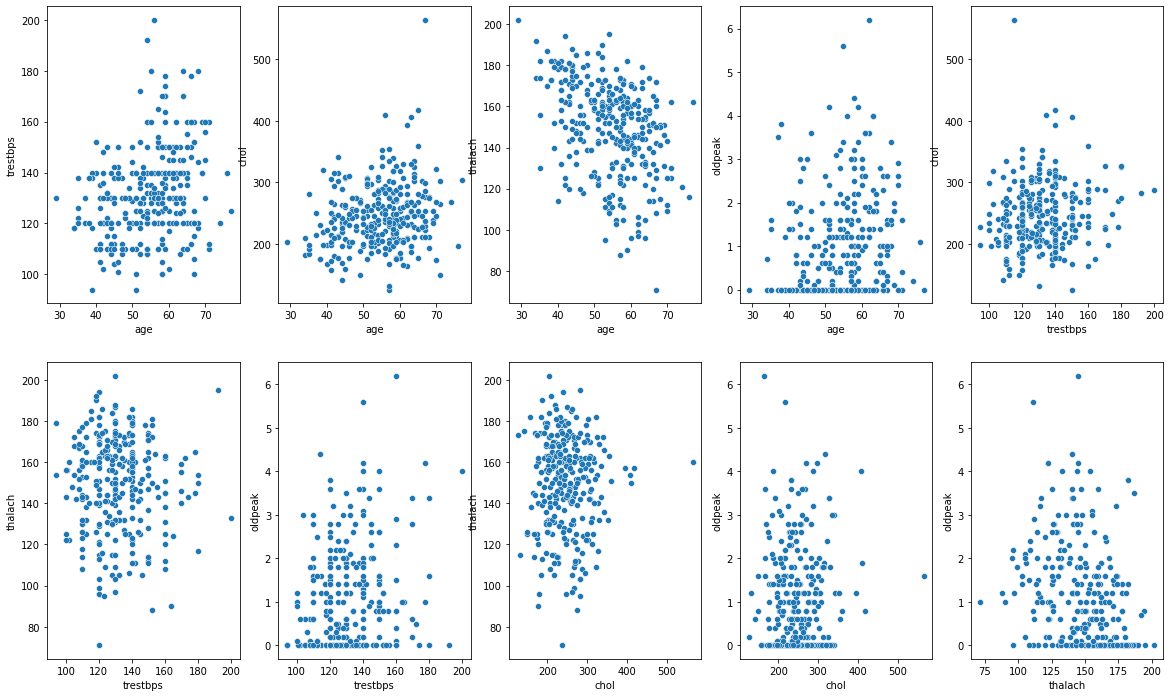

In [7]:
#------------------------- Function of all possible features combinations ------------------------#
def combinations(feature):
    
    cont = len(feature)
    init = 1
    x    = []
    y    = []

    for i in range(cont):
    
        for j in range(init, cont):
        
            if (i != j):
            
                x.append(feature[i])
                y.append(feature[j])
            
        init += 1
        
    return x,y


#------------------------------ All combinations among numerical features -----------------------------#
x, y = combinations(num_feature)


#-------------------------------------------------- Plot ----------------------------------------------#
fig, ax = plt.subplots(2, 5, figsize = (20, 12))

for i, ax in enumerate(fig.axes):
        
    g = sns.scatterplot(x = df[x[i]], y = df[y[i]], ax = ax)
        

In a first moment there is no such strong correlation among numerical features.

## 3. Categorical features

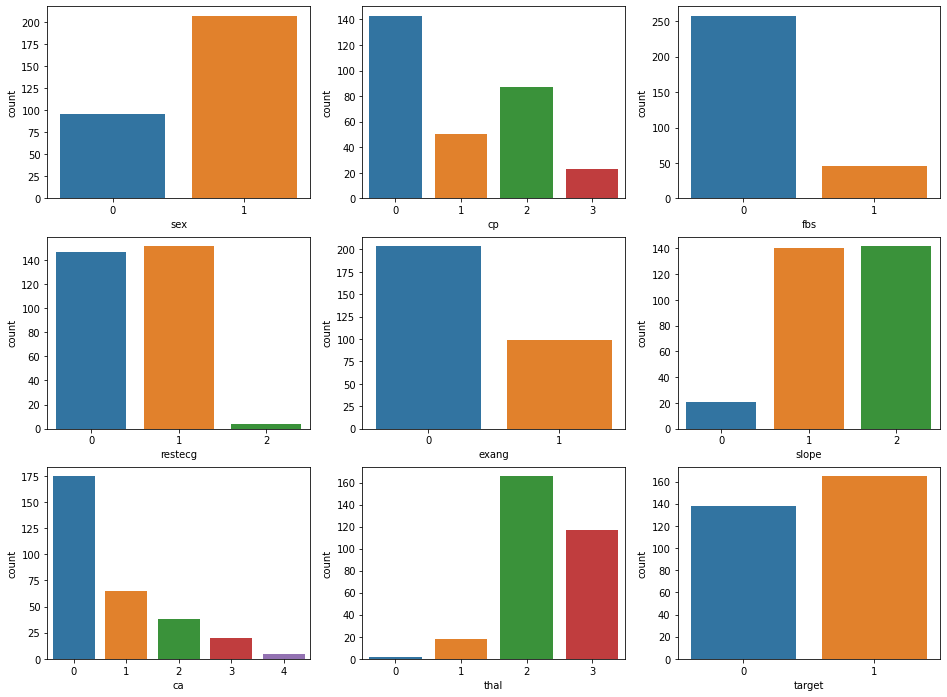

In [8]:
cat_feature = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

fig, ax = plt.subplots(3, 3, figsize = (16, 12))

for i, ax in enumerate(fig.axes):
        
    g = sns.countplot(data = df, x = cat_feature[i], ax = ax)

### 3.1. Categorical feature's correlation

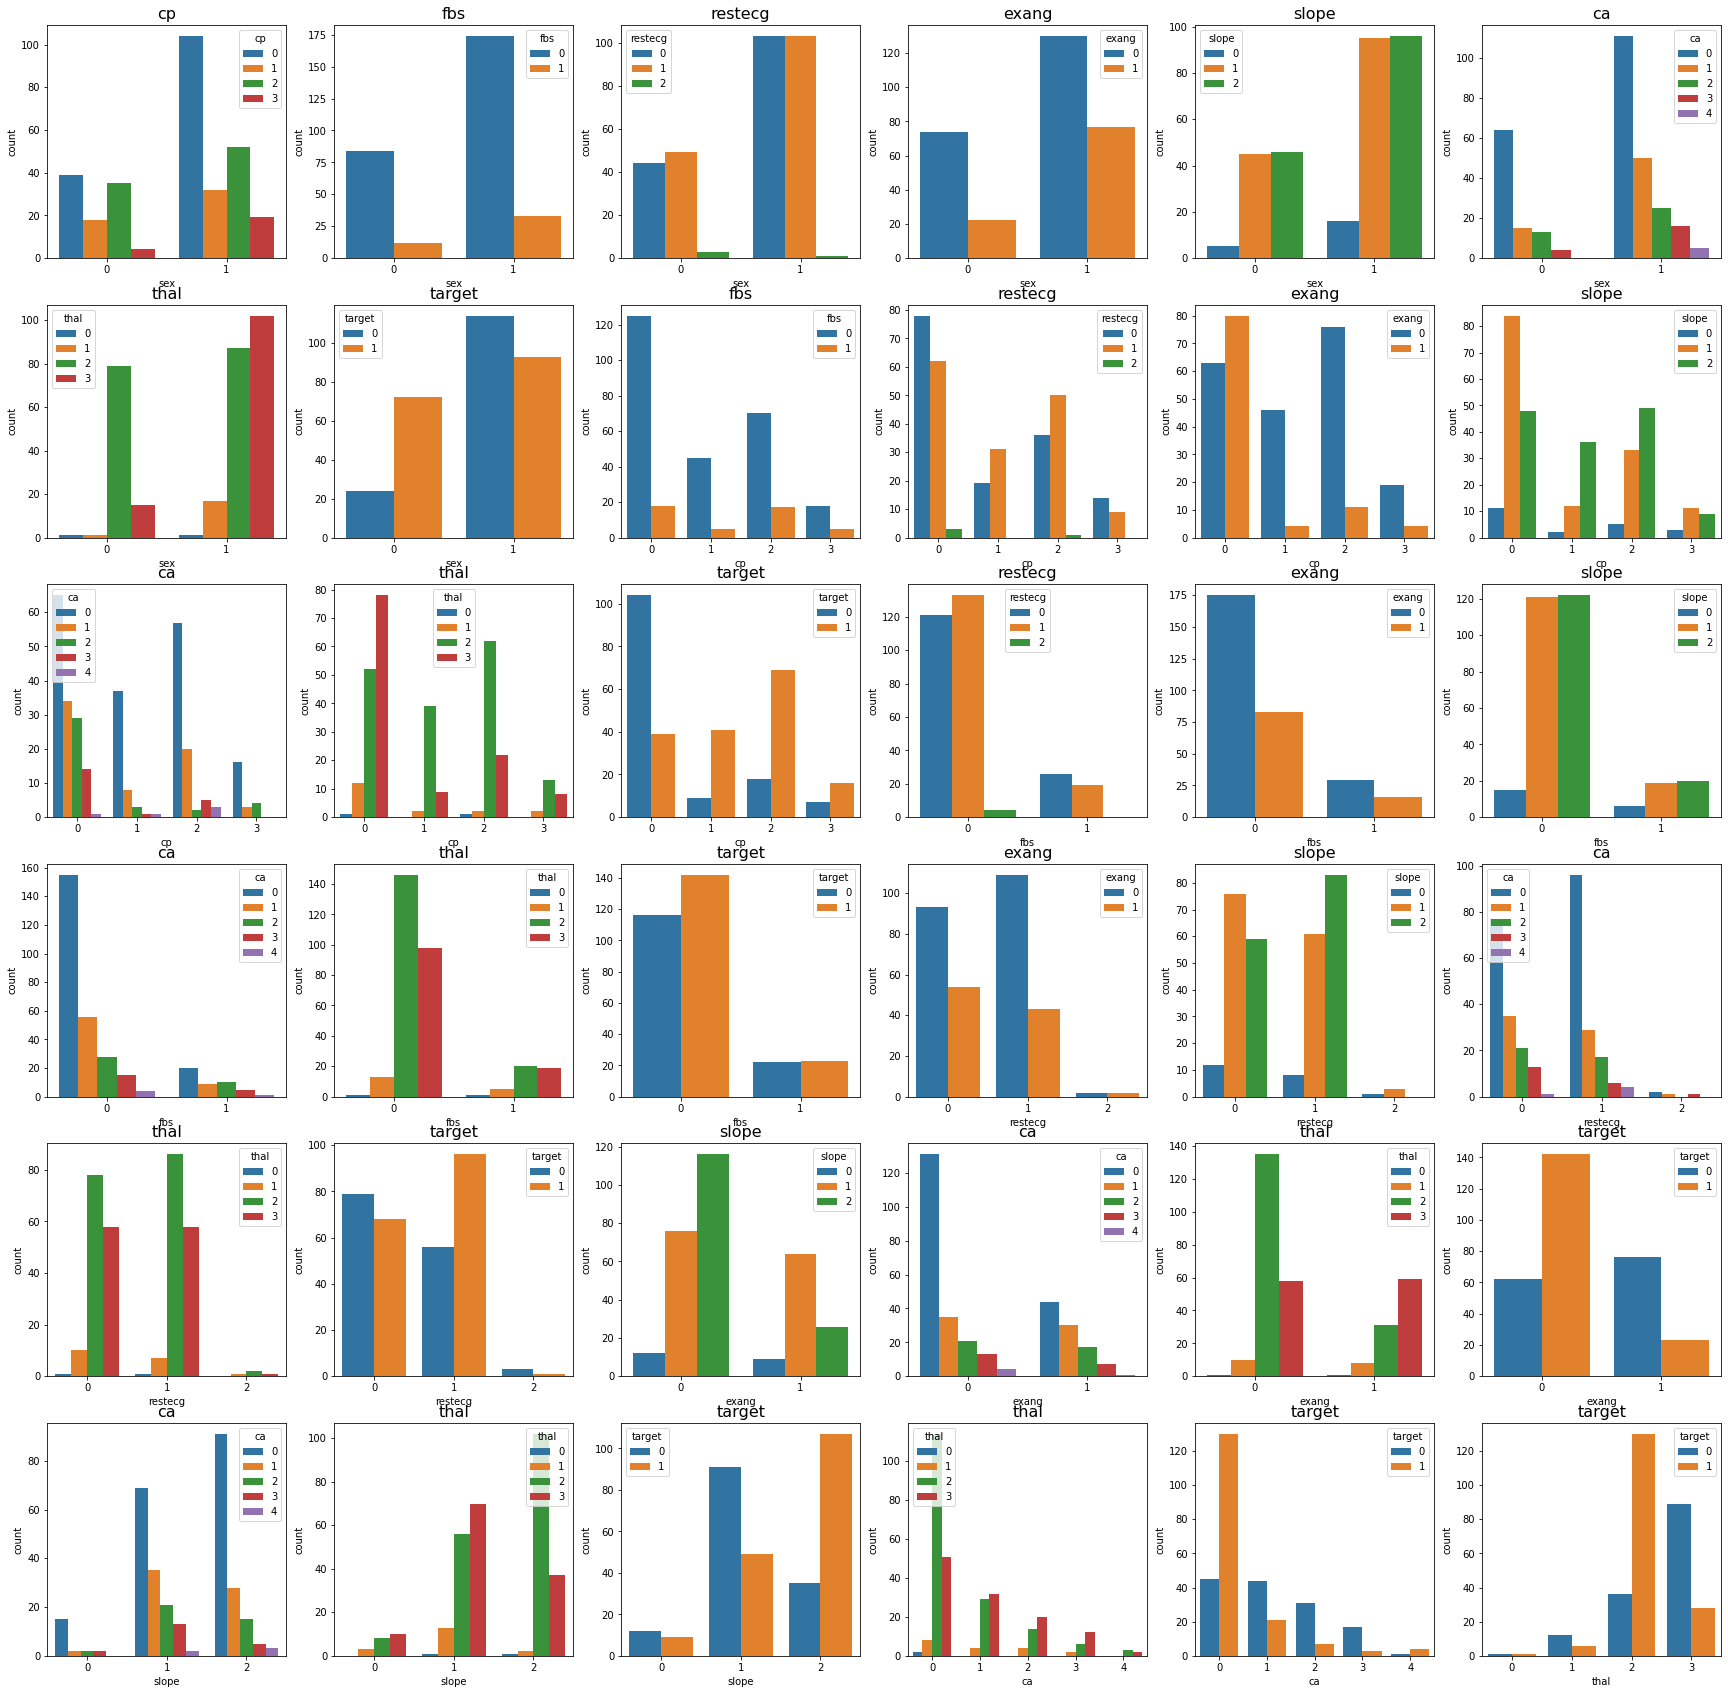

In [9]:
#------------------------------ All combinations among categorical features -----------------------------#
x, y = combinations(cat_feature)



#-------------------------------------------------- Plot ----------------------------------------------#
fig, ax = plt.subplots(6, 6, figsize = (30, 30))

for i, ax in enumerate(fig.axes):
    
    g = sns.countplot(data = df, x = x[i], hue = y[i], ax = ax)
    g.set_title(y[i], fontsize = 16)
    

In [10]:

def proportion (x, y):
    
    value = []
    dictionary = {}
    cont = 0
    
    for i in range(len(x)):
        
        nx = df[x[i]].nunique()
        ny = df[y[i]].nunique()
        
        group = df.groupby([x[i], y[i]]).count()["age"]
        
        #print("################### Correlation between", x[i], "X", y[i], "#####################")
        #print("")
        
        for j in range(nx):
            
            total = group[j].sum()
                
            for l in range(ny):
                
                if (group[j].index == l).any():
                    
                    proportion = group[j][l]/total
                
                    #print("Proportion of",x[i], "equals to", j, "and", y[i], "equals to", l)
                    #print(group[j][l]/total)
                    #print("")
                    #print("")
                
                    value.append(proportion)
            
            #------------------------ Saving as dict ------------------------#
            dictionary[cont] = value
            value = []
            cont += 1
            
    return dictionary 

d = proportion (x, y)

In [11]:
#---------------------------- Function to extract each feature's proportion -------------------------------#

def feature_prop(feature, x, y, dictionary, init):
    
    f_prop = []
    y_ft_name = []
    n = len(df[feature].unique())*x.count(feature)
    
    for i in range(init, init+n):
            
        f_prop.append(dictionary[i])
    
    for j in range(len(x)):
        
        if x[j] == feature:
            
            y_ft_name.append(y[j])
    
    return f_prop, y_ft_name, n

### 3.1.1. Proportion between "sex" and "categorical features"

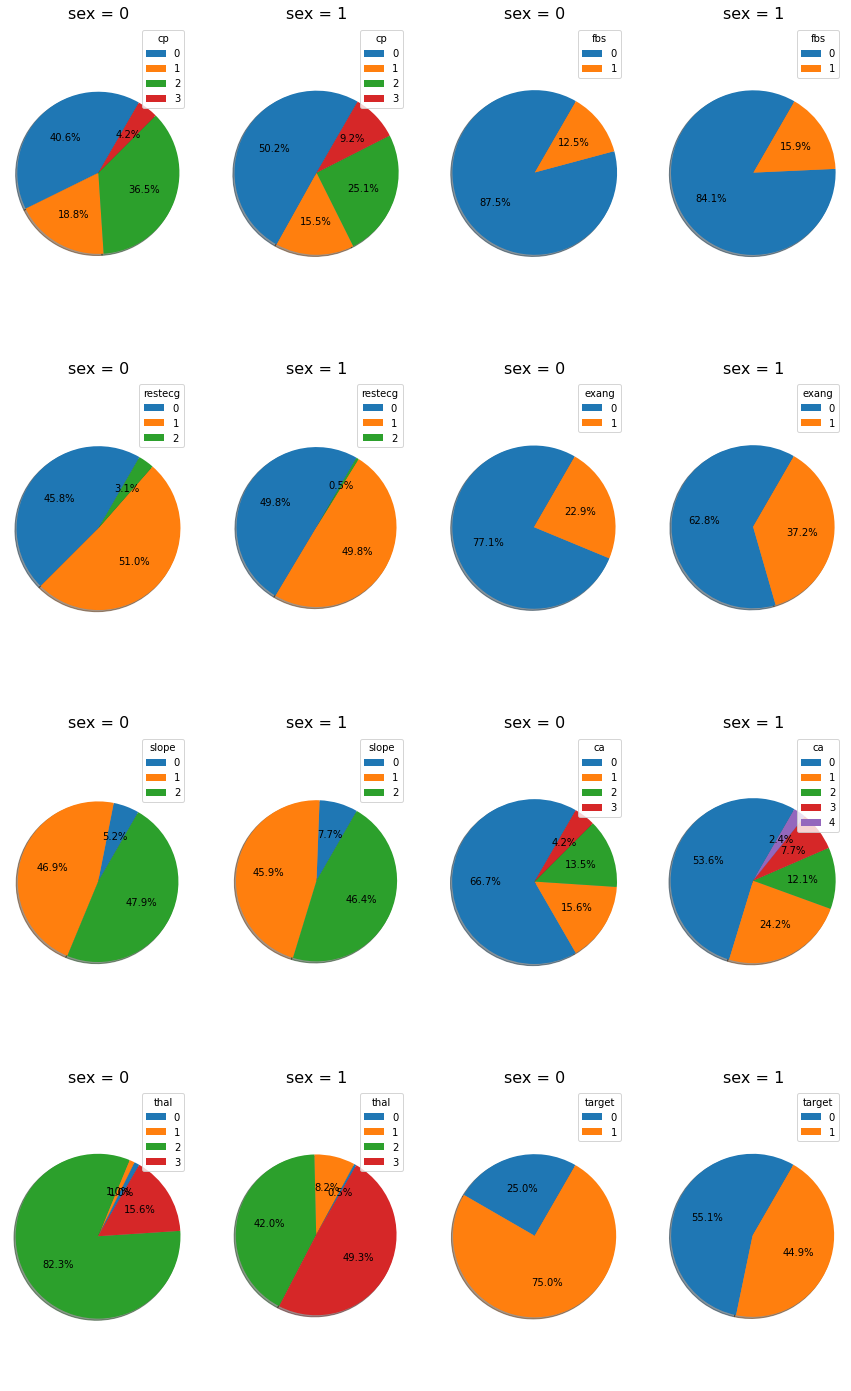

In [12]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("sex", x, y, d, 0)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["sex"].unique())
cat =[]

for _, l in enumerate(sorted(df["sex"].unique())):
    
    cat.append("sex = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 4
m = 4
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

Some interesting points here are:

* Sex 'male' seems to have more chest pain typical angina than female. Another point, proportion of non-typical angina pain in female is almost the same of typical angina. However this not what occur in male gender;

* Sex 'male' is a little bit more susceptible of angina induced by exercise than 'female' gender. Maybe this happen because angina induced by exercise is more detectable when chest pain is typical angina;

* Another relevant point is related with thalassemia blood disorder and 'male' gender. Is possible to see that 'male' gender is more susceptible to have a blood disorder.

* The final observation about sex attribute is 'female' gender seems to have less probability of take an heart disease. However 'male' gender is a hard class to distinguish between 'have' or 'not have' a heart disease.  

### 3.1.2. Proportion between "cp" and "categorical features"

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


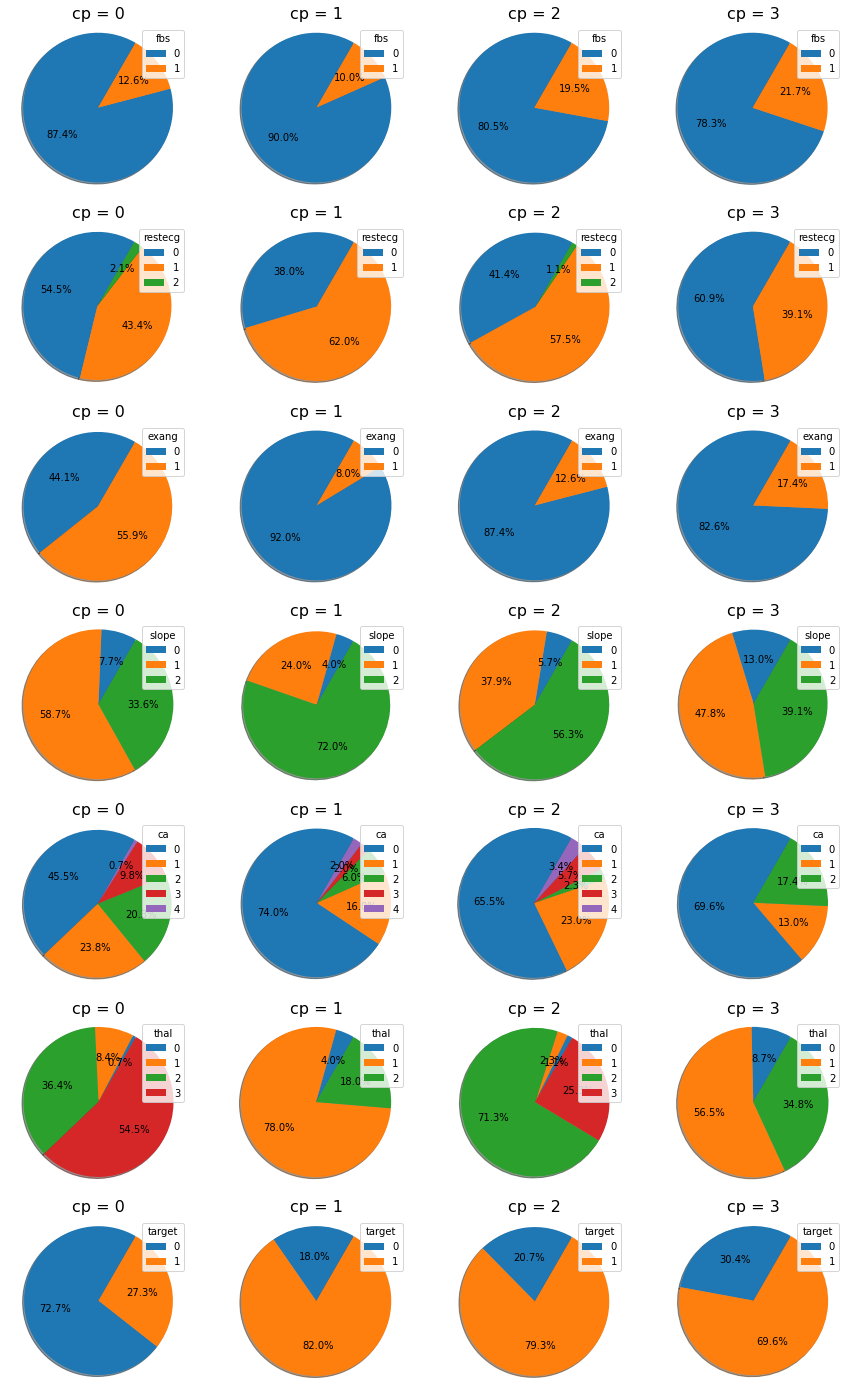

In [13]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("cp", x, y, d, 16)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["cp"].unique())
cat =[]

for _, l in enumerate(sorted(df["cp"].unique())):
    
    cat.append("cp = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 7
m = 4
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

Some points to take a look:

* "cp" like 1- atypical angina; 2-non-angina increase the chances of detection problems with ST-T;
* As said before, is possible to see that people who take typical angina are more suitable for take an angina induced by exercise;
* It seems "cp" like 1- atypical angina; 2-non-angina increase downsloping in ST segment. This might be a possible case of coronary ischemia;
* The total amount of colored vessels (since 1 until 3 or more) of "cp" typical angina is bigger than the others;


### 3.1.3. Proportion between "fbs" and "categorical features"

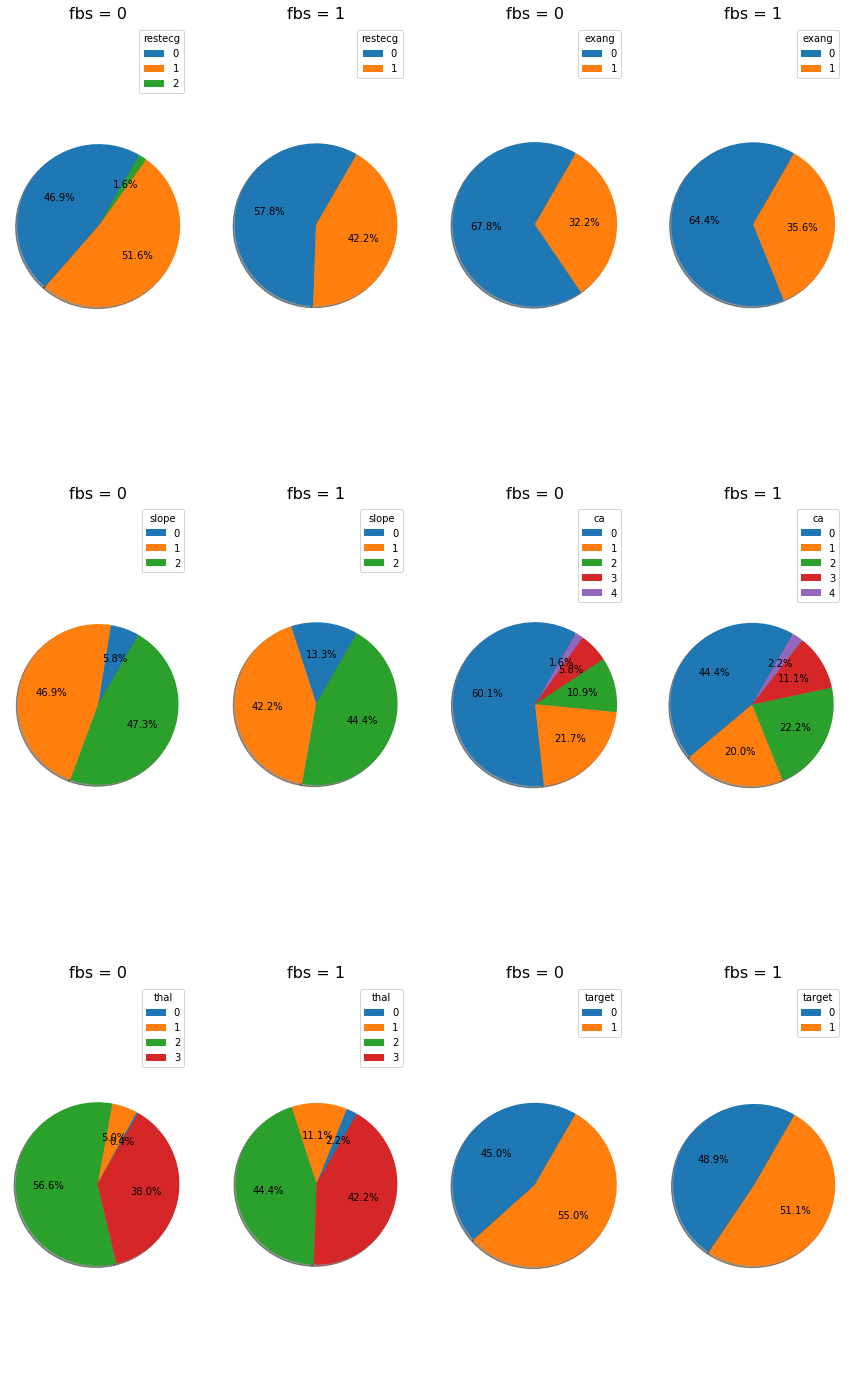

In [14]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("fbs", x, y, d, 44)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["fbs"].unique())
cat =[]

for _, l in enumerate(sorted(df["fbs"].unique())):
    
    cat.append("fbs = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 3
m = 4
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

* An important point here is **fbs** doesn't influence heart disease. It doesn't matter if **fbs** is **0 or 1**.

### 3.1.4. Proportion between "restecg" and "categorical features"

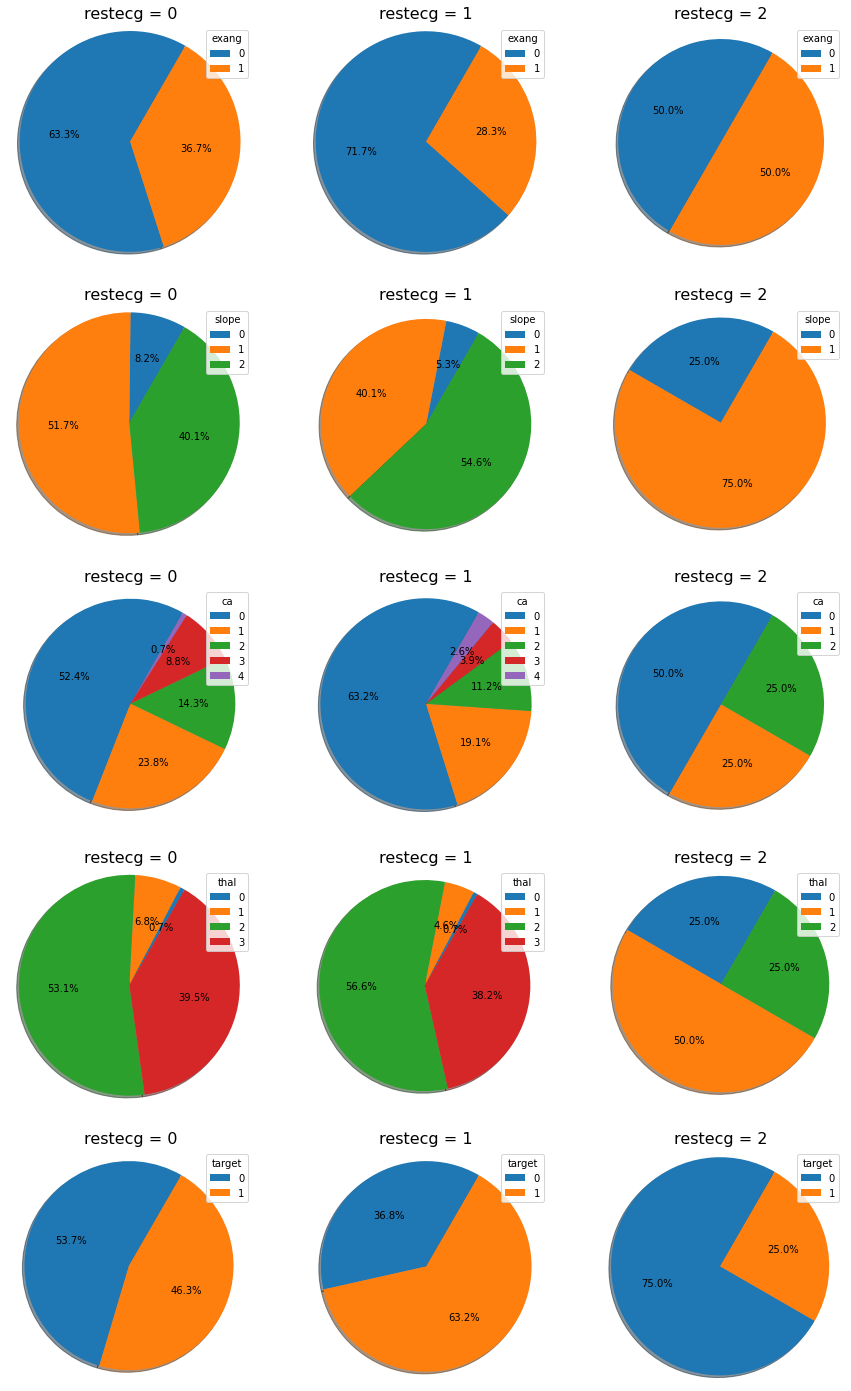

In [15]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("restecg", x, y, d, 56)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["restecg"].unique())
cat =[]

for _, l in enumerate(sorted(df["restecg"].unique())):
    
    cat.append("restecg = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 5
m = 3
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

* Observing feature **restecg** and the **exang** proportion, the amount of positive cases in "hypertrophy" is greater than "Normal" that is greater than "Having ST-T". It's a little consufed because "Normal" cases should have lower positive cases of angina than "Having-ST". However taking a look in **ca** proportion of "Normal", the amount of colored vessels is greater than "Having ST-T". Thus "Normal" case in **restecg** may not indicate a perfect good health condition. Perhaps some of these "Normal" cases have a heart disfunction that can't be detected with electrocardiogram.

* The relation between **restecg** and **target** seems to be linked to **exang** or **ca**. In "Hypertrophy" the proportion of **exang** and **ca** is greater than the others, so the amount of heart diseases is high. The second one is "Normal" and so on for "Having ST-T".

### 3.1.5. Proportion between "exang" and "categorical features"

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


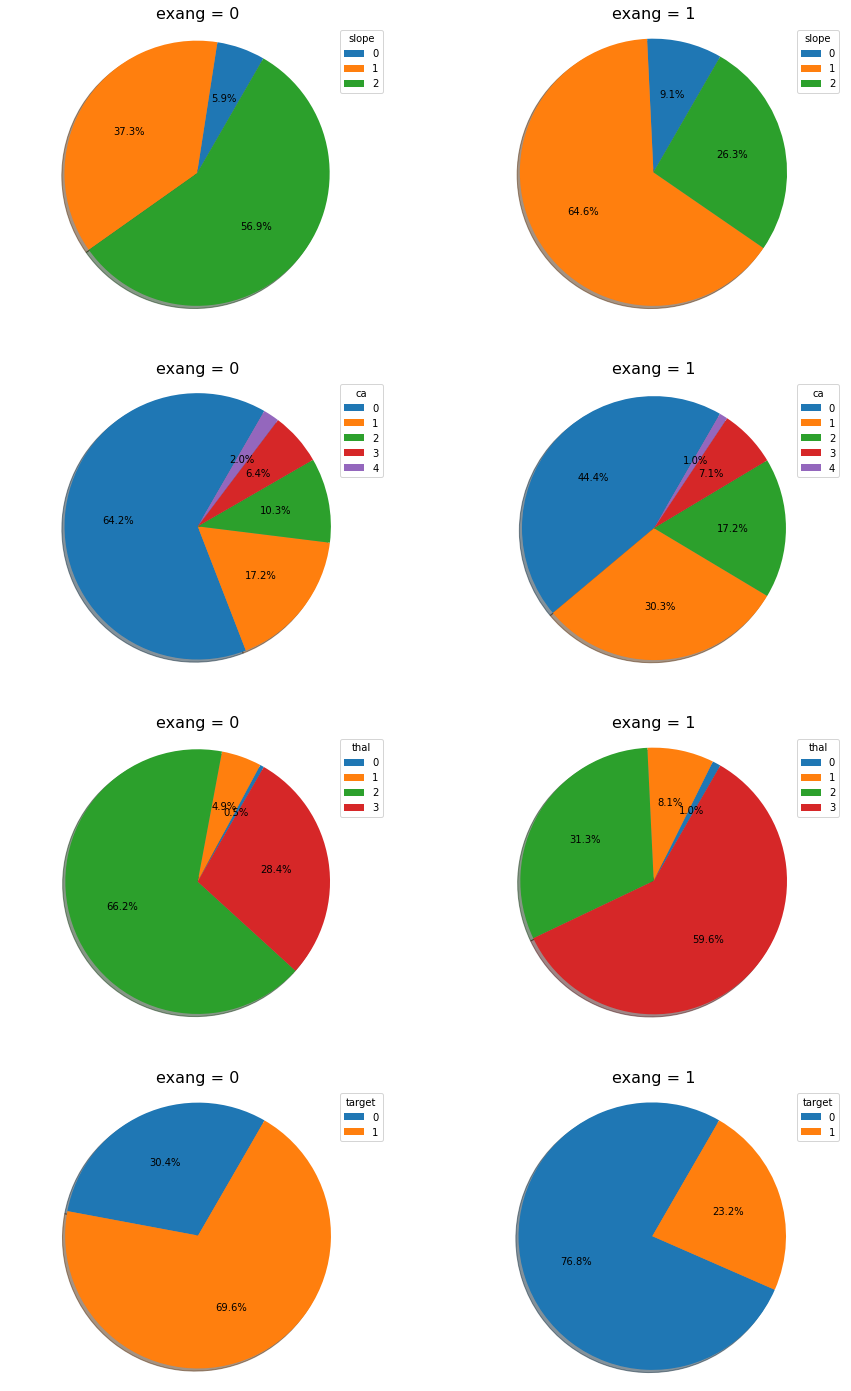

In [16]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("exang", x, y, d, 71)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["exang"].unique())
cat =[]

for _, l in enumerate(sorted(df["exang"].unique())):
    
    cat.append("exang = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 4
m = 2
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

* An interesting point about 'exang' is a notorius relation between exercise induced angina and thalassemia. As much'exang' is detected, more problems about blood flow are present. This make sense because angina is a blood flow problem. 

* Another point relates exercise induced angina and heart disease. It seems a positive case of "exang" indicates a high probability to develop a heart problem.

### 3.1.6. Proportion between "slope" and "categorical features"

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


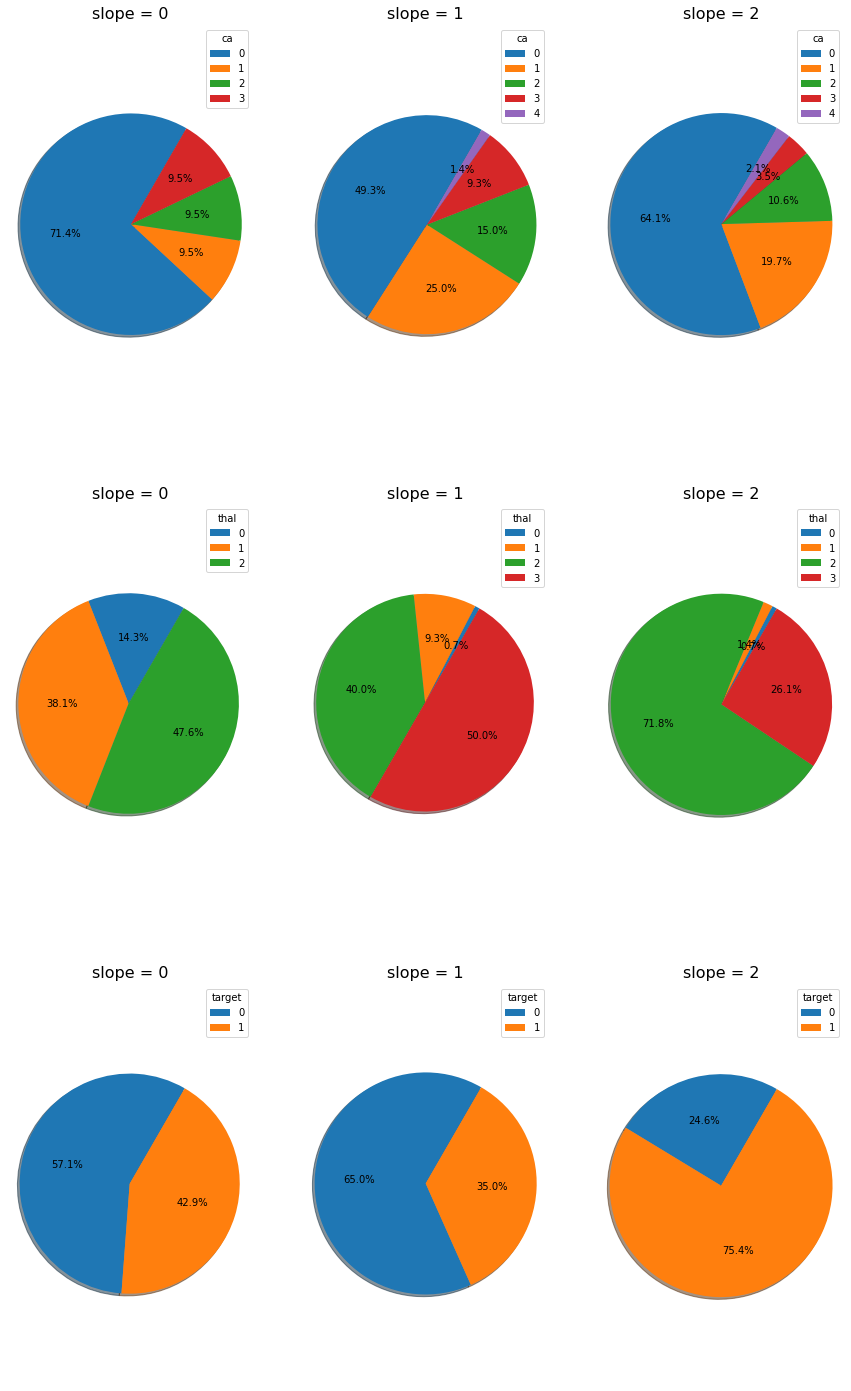

In [17]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("slope", x, y, d, 79)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["slope"].unique())
cat =[]

for _, l in enumerate(sorted(df["slope"].unique())):
    
    cat.append("slope = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 3
m = 3
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

### 3.1.7. Proportion between "ca" and "categorical features"

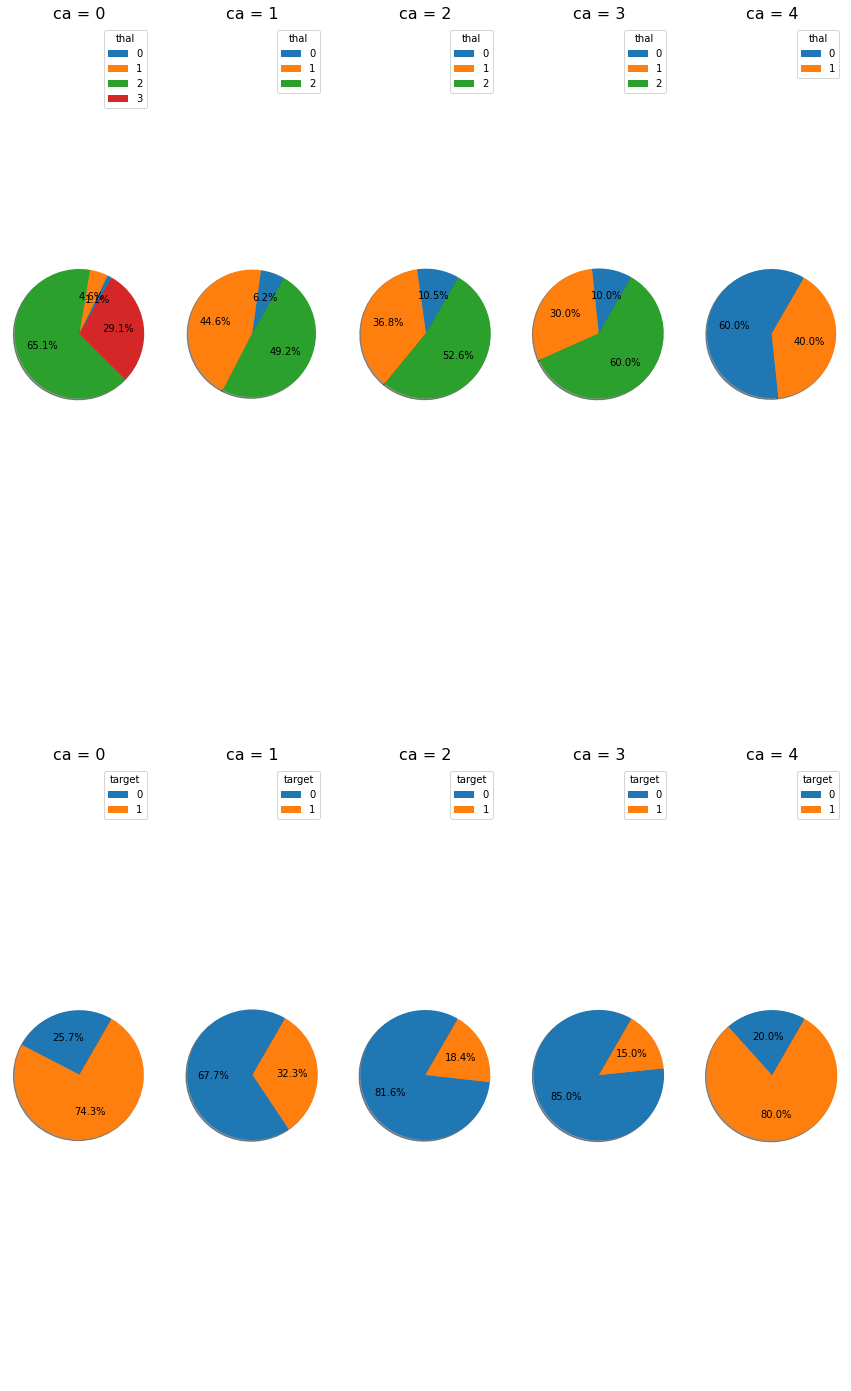

In [18]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("ca", x, y, d, 88)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["ca"].unique())
cat =[]

for _, l in enumerate(sorted(df["ca"].unique())):
    
    cat.append("ca = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 2
m = 5
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

* The relationship between "ca" and "thal" show us no colored vessels may no indicate a complete absence of blood flow problem. Observing "thal" what occurs is a high proportion of 'normal' cases but also a considerable amount of unusual blood flow problems. 

* For colored vessels the proportion of no blood flow in some part of the heart (relates to "thal") increases considerable. But the amount of normal cases in "thal" is almost the for all cases of "cp".

* "ca" is directly correlated with heart diseaase. When the number of colored vessels increases, less blood flow we have, so the cases of heart disease increase.

### 3.1.8. Proportion between "thal" and "categorical features"

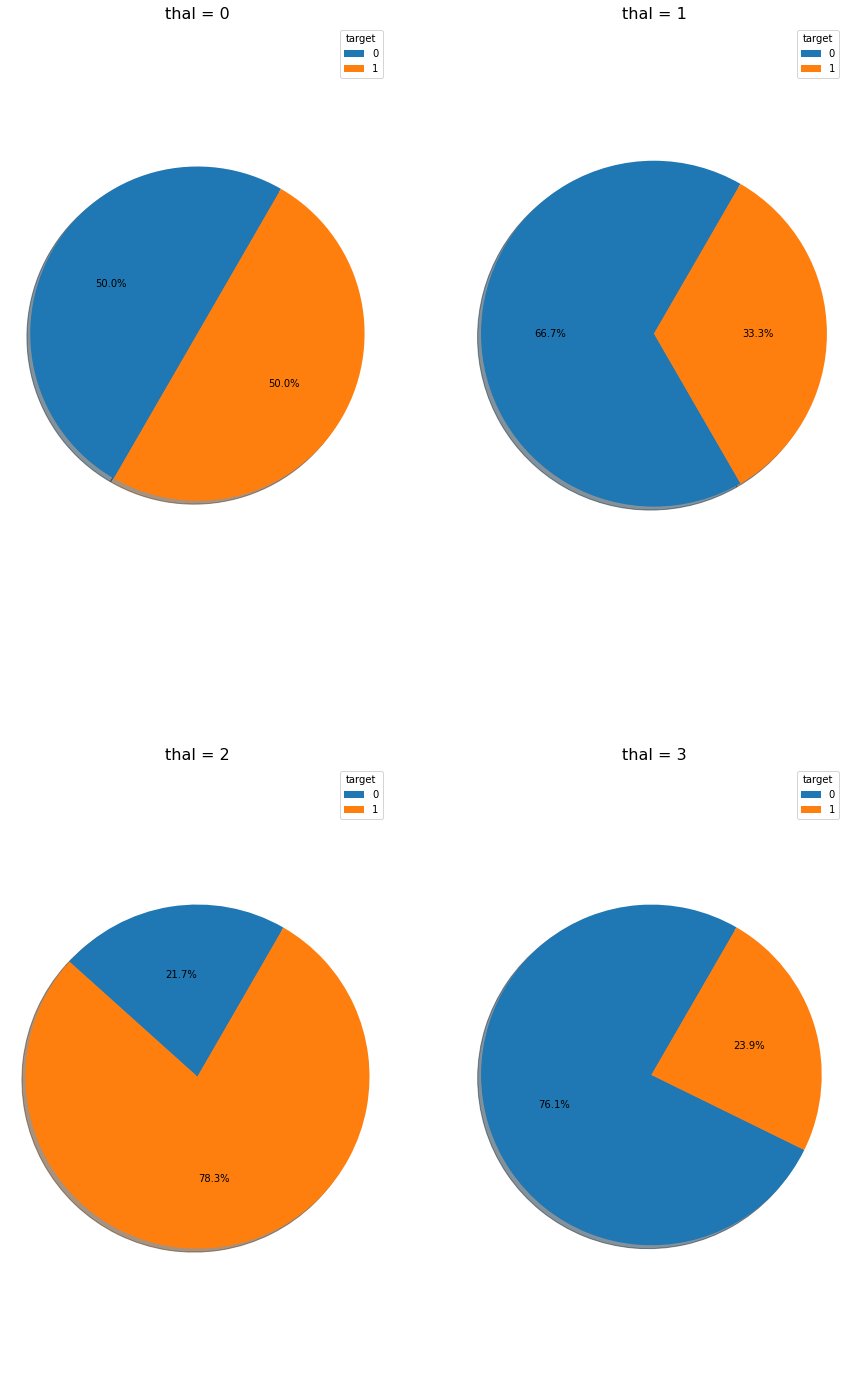

In [19]:
#------------------------------------------ Function -----------------------------------------------------#
sex_prop, y_ft, n_ = feature_prop("thal", x, y, d, 98)


#----------------------------------------- Some parameters -----------------------------------------------#
n_cat = len(df["thal"].unique())
cat =[]

for _, l in enumerate(sorted(df["thal"].unique())):
    
    cat.append("thal = "+str(l))
    
cat = cat * len(y_ft)


#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 2
m = 2
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
cont_y = 0


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    
    for j in range(m):
        
        ax[i,j].pie(sex_prop[cont], autopct='%1.1f%%', shadow=True, startangle=60)
        
        ax[i,j].axis('equal')
        ax[i,j].set_title(cat[cont], loc = "center", fontsize = 16)
        ax[i,j].legend(sorted(df[y_ft[cont_y]].unique()), title = y_ft[cont_y], 
                       loc = "upper right")
        
        cont += 1
        
        if cont%n_cat == 0:
            
            cont_y += 1

* In "thal" variable is seen a strong relation in fixed defect and reversible defect with increasing in heart disease cases. 

* For "thal" equals "0" there is a problem with null values. Unfortunatly this value can't ve evaluated by "target" because the proportion is equal for both classifications. 

## 4. Numerical and categorical features

### 4.1.  Correlation between age and categorical features

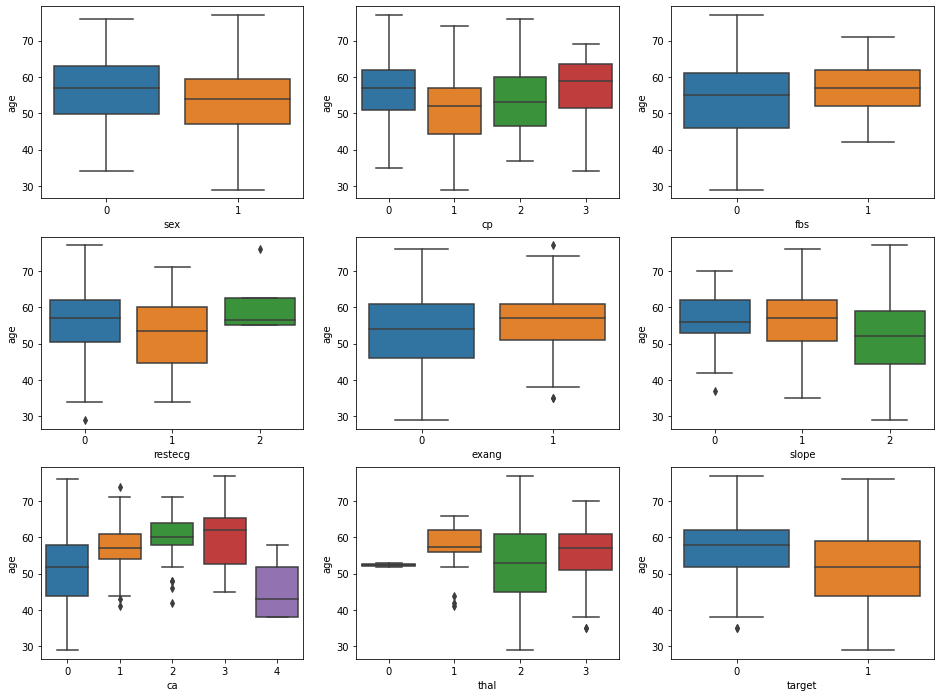

In [20]:
def graph_N_Cat(num_f):

    fig, ax = plt.subplots(3, 3, figsize = (16, 12))
    cont = 0

    for i, ax in enumerate(fig.axes):
    
        g = sns.boxplot(x = df[cat_feature[cont]], y = df[num_f], ax = ax)
        
        cont +=1
    
graph_N_Cat("age")

* Some features seems to not be affected by age. However is seen an increasing in age with number of colored vessels. As much **ca** increases, more mean **age** increases too.
* Another point is older people have more chances to take some heart disease, if you see **age** and **target**.

### 4.2.  Correlation between trestbps and categorical features

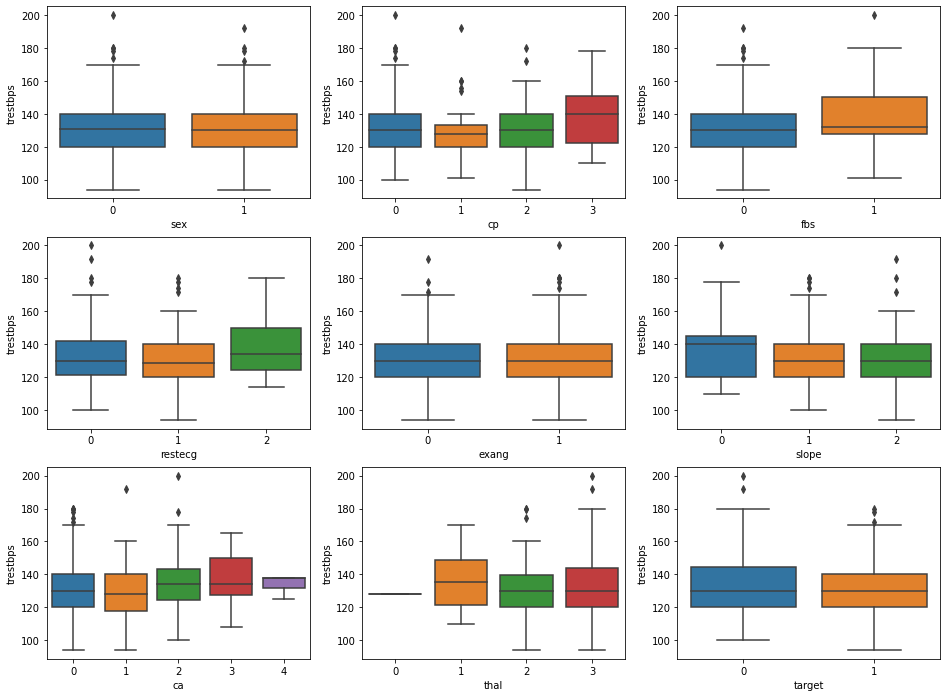

In [21]:
graph_N_Cat("trestbps")

* **trestbps** didn't show any effect about **target**.

### 4.3.  Correlation between chol and categorical features

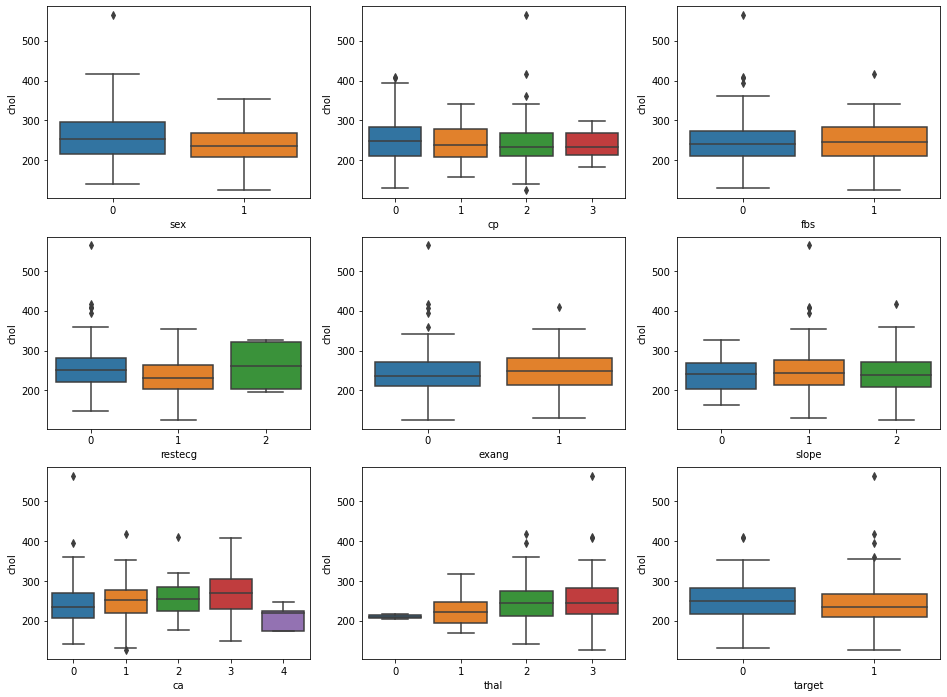

In [22]:
graph_N_Cat("chol")

* **chol** didn't show so much effect about **target**. But as we know, problems with cohesterol can bring bad consequences for heart. So my suggestion is to keep this feature.

### 4.4.  Correlation between thalach and categorical features

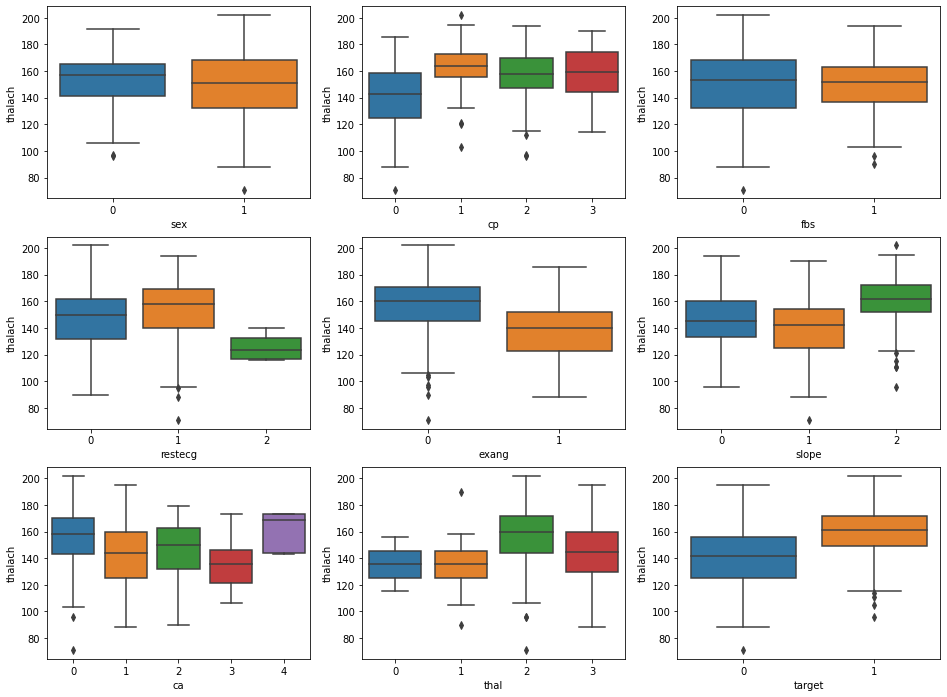

In [23]:
graph_N_Cat("thalach")

* different the other two features above, **thalach** is correlated with **target**. In this dataset, a low **thalach** (maximum heart rate achieved) may indicate a heart problem.

### 4.5.  Correlation between oldpeak and categorical features

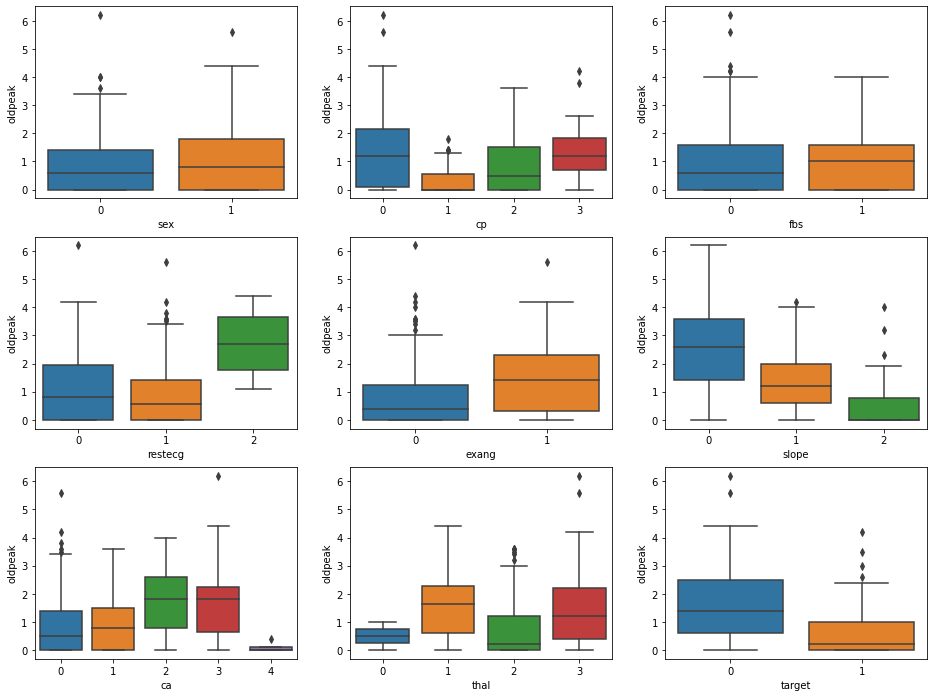

In [24]:
graph_N_Cat("oldpeak")

* The last feature also have a considerable influence about **target**. As much **oldpeak** increases, more chances we have to take a heart disease. 

After this data analysis, some varibles can be removed once they weren't correlated with **target**:

* **1. trestbps**;
* **2. fbs**.

In [25]:
#---------------------- Drop some features and splitting target from other features -----------------#
target = df["target"]
new_df = df.drop(columns= ["trestbps", "fbs", "target"])

In [26]:
#------------------------------------- Train and test split -------------------------------------#
X_train, X_test, Y_train, Y_test = train_test_split(new_df, target, 
                                                    test_size= 0.2, random_state= 101)


#---------------------------- Hyperparameters adjusting by gridsearch ----------------------------#

model = DecisionTreeClassifier(random_state= 0)

hyperparameters = {'max_depth': [1, 2, 3, 5, 7, 9, 12], "max_features": [1, 2, 3, 5, 7, 9], 
                   "criterion": ["gini", "entropy"], "min_samples_leaf": [1, 2, 3, 5, 7, 9],
                   "min_samples_split": [2, 3 ,5 ,7, 9]}


grid_search = GridSearchCV(estimator = model, param_grid = hyperparameters).fit(X_train, Y_train)

#print(grid_search.cv_results_['mean_test_score'])

print("################################# Best hyperparameters #############################")
print(grid_search.best_estimator_)


#-------------------- Prediction with train dataset -----------------------------#
pred_train = grid_search.predict(X_train)

#-------------------- Prediction with test dataset -----------------------------#
pred_test = grid_search.predict(X_test)

#---------------------- Accuracy with train dataset ----------------------------#
acc_train = accuracy_score(Y_train, pred_train)

#---------------------- Accuracy with test dataset ----------------------------#
acc_test = accuracy_score(Y_test, pred_test)

#---------------------- Confusion matrix with train dataset ----------------------------#
matrix_train = confusion_matrix(Y_train, pred_train)

#---------------------- Confusion matrix with test dataset ----------------------------#
matrix_test = confusion_matrix(Y_test, pred_test)


print("")
print("Accuracy on train dataset: ", round(acc_train*100, 2), "%")
print("###################### Confusion matrix on train dataset #########################")
print(matrix_train)

print("")
print("Accuracy on test dataset: ", round(acc_test*100, 2), "%")
print("###################### Confusion matrix on test dataset #########################")
print(matrix_test)


################################# Best hyperparameters #############################
DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=5,
                       random_state=0)

Accuracy on train dataset:  89.26 %
###################### Confusion matrix on train dataset #########################
[[ 94  13]
 [ 13 122]]

Accuracy on test dataset:  86.89 %
###################### Confusion matrix on test dataset #########################
[[25  6]
 [ 2 28]]


* The results of model prediction above show us that majority of both classes (0 and 1) were predict correctly as well train as test. 

### References

* **Centers for Disease Control and Prevention:** https://www.cdc.gov/heartdisease/about.htm
* **Mayo Clinic:** https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118